In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [115]:
#test_df = pd.read_csv("./input/test.csv")
train_df = pd.read_csv("./data/train.csv")
#sample_submission_df = pd.read_csv("./input/sample_submission.csv")

## 귀찮으시면, 
# ctrl+f  + 끝 
## 부터 보시면 러닝 돌린거부터 볼 수 있습니다~

## 아래부터 전처리 갑니다.

In [3]:
train_df.keys()

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [4]:
train_df.shape

(26729, 10)

In [116]:
test_df.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


## 전처리

성별 column과 중성화 column 추가

In [5]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

In [6]:
train_df['Sex'] = train_df.SexuponOutcome.apply(get_sex)
train_df['Neutered'] = train_df.SexuponOutcome.apply(get_neutered)

In [7]:
# 이름과 subtype 전처리
train_df['Name'] = train_df['Name'].replace(np.nan, 'Unknown', regex=True)
train_df['OutcomeSubtype'] = train_df['OutcomeSubtype'].replace(np.nan, 'None', regex=True)
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].replace(np.nan, '0 days', regex=True)

In [8]:
# AgeuponOutcome -> 일수로 변경
from pandas import Series
byday = []

for i in train_df['AgeuponOutcome']:
    i = str(i)
    num, unit = i.split(' ')
    if unit == 'day' or unit == 'days':
        num = int(num) * 1
    elif unit == 'week' or unit == 'weeks':
        num = int(num) * 7
    elif unit == 'month' or unit == 'months':
        num = int(num) * 30
    else:
        num = int(num) * 365
    byday.append(num)

train_df['AgebyDay'] = Series(byday)

In [9]:
# Name 유무 변수 생성

def is_name(x):
    x = str(x)
    if x.find('Unknow') >= 0: return 0
    else: return 1

train_df['isName'] = train_df.Name.apply(is_name)

In [10]:
# Color 단순화 1단계 '/'제거
from pandas import Series
df2_c = train_df

bymain = []

for i in df2_c['Color']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        bymain.append(f)
    else:
        bymain.append(i)

df2_c['newColor'] = Series(bymain)

In [11]:
# Color 단순화 2단계 main color로 치환

def get_mainC(x):
    x = str(x)
    if x.find('Black') >= 0: return 'Black'
    if x.find('White') >= 0: return 'White'
    if x.find('Brown') >= 0: return 'Brown'
    if x.find('Orange') >= 0: return 'Orange'
    if x.find('Blue') >= 0: return 'Blue'
    if x.find('Red') >= 0: return 'Red'
    else: return x

df2_c['newColor2'] = df2_c.newColor.apply(get_mainC)

In [47]:
train_df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
26724,A702446,Unknown,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,male,intact,30,0,Brown Tabby,Brown
26725,A718934,Unknown,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,female,neutered,90,0,Brown Tabby,Brown
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,None,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,male,neutered,1460,1,White,White
26727,A677478,Unknown,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,male,intact,28,0,Black,Black
26728,A706629,Unknown,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,male,intact,365,0,Brown Tabby,Brown


In [ ]:
type(train_df)

In [106]:
# useing variables
uvar = ['OutcomeType', 'AnimalType', 'Sex', 'Neutered', 'AgebyDay', 'isName', 'newColor2']
uvar_c = ['AnimalType', 'Sex', 'Neutered', 'AgebyDay', 'isName', 'newColor2']

In [107]:
train_df[uvar].keys()

Index(['OutcomeType', 'AnimalType', 'Sex', 'Neutered', 'AgebyDay', 'isName',
       'newColor2'],
      dtype='object')

In [108]:
df_uv = train_df[uvar]
df_uv.target = df_uv.iloc[:,0]
df_uv.data = df_uv.iloc[:,1:]

In [109]:
df_uv.target.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [110]:
# 더미화

In [111]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#df_uv.data['OutcomeSubtype'] = encoder.fit_transform(df_uv.data['OutcomeSubtype'])
df_uv.data['AnimalType'] = encoder.fit_transform(df_uv.data['AnimalType'])
df_uv.data['Sex'] = encoder.fit_transform(df_uv.data['Sex'])
df_uv.data['Neutered'] = encoder.fit_transform(df_uv.data['Neutered'])
df_uv.data['newColor2'] = encoder.fit_transform(df_uv.data['newColor2'])

In [148]:
df_uv.data.keys()

Index(['AnimalType', 'Sex', 'Neutered', 'AgebyDay', 'isName', 'newColor2'], dtype='object')

In [149]:
df_uv.target.keys()

RangeIndex(start=0, stop=26729, step=1)

# 전처리 끝

### df_uv.target 과 df_uv.data 로 나뉨.

- df_uv.target  ->  ['OutcomeType']
- df_uv.data  ->  ['AnimalType', 'Sex', 'Neutered', 'AgebyDay', 'isName', 'newColor2']

In [112]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

In [113]:
clf = clf.fit(df_uv.data, df_uv.target)

In [114]:
clf.score(df_uv.data, df_uv.target)

0.63672415728235254

In [117]:
from IPython.display import Image
from sklearn import tree
import pydotplus 
import graphviz

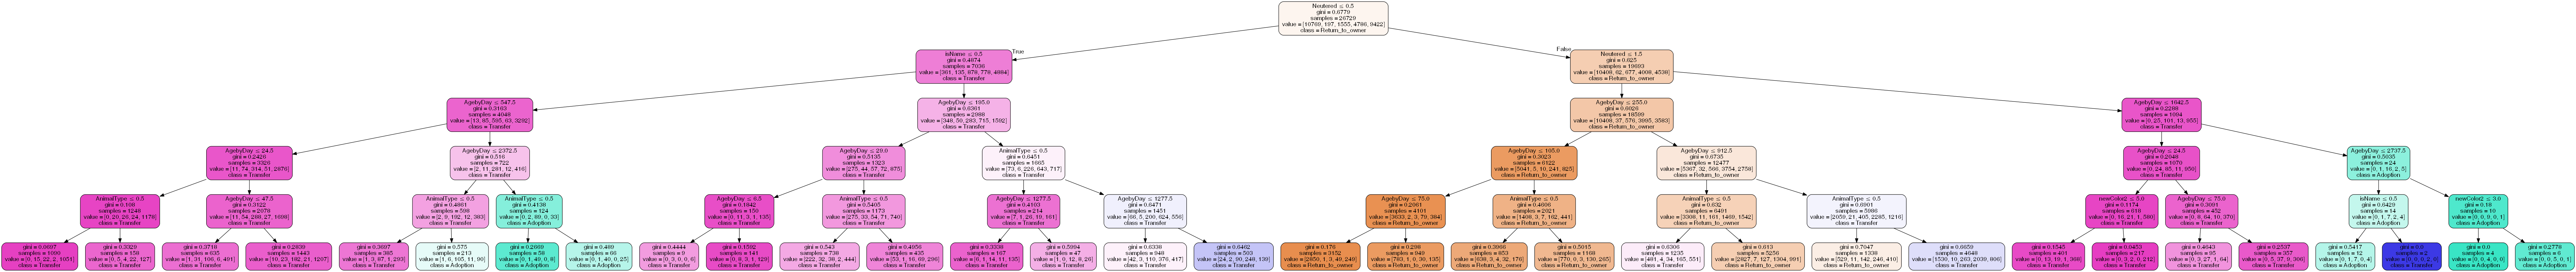

In [118]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=uvar_c,
                        class_names=train_df.OutcomeType,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
# Bagging

In [129]:
from sklearn.ensemble import BaggingClassifier

In [130]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [131]:
bagging.fit(df_uv.data, df_uv.target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [132]:
bagging.score(df_uv.data, df_uv.target)

0.63687380747502709

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [135]:
bagging.fit(df_uv.data, df_uv.target)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [136]:
bagging.score(df_uv.data, df_uv.target)

0.62168431291855286

In [137]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

In [138]:
rfc = RandomForestClassifier(n_estimators=10)

In [139]:
rfc.fit(df_uv.data, df_uv.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [140]:
rfc.score(df_uv.data, df_uv.target)

0.6888772494294586

In [141]:
# feature importance
rfc.feature_importances_

array([ 0.06482434,  0.05352817,  0.277172  ,  0.35037184,  0.11199644,
        0.14210721])

In [142]:
pd.Series(rfc.feature_importances_, index=uvar_c)

AnimalType    0.064824
Sex           0.053528
Neutered      0.277172
AgebyDay      0.350372
isName        0.111996
newColor2     0.142107
dtype: float64

In [150]:
# Boosting

In [152]:
# target 더미화
df_uv.target = encoder.fit_transform(df_uv.target)

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [162]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state=1)

In [163]:
regr_1.fit(df_uv.data, df_uv.target)
regr_2.fit(df_uv.data, df_uv.target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1)

In [164]:
regr_1.score(df_uv.data, df_uv.target)
regr_2.score(df_uv.data, df_uv.target)

0.34770500827014938

## boosting 잘 한건 지 모르겟음.

## 시간 오래걸림... 주의 요함... (근데 성적은 고만고만...)

In [ ]:
# SVM

In [165]:
from sklearn import svm
svmex = svm.SVC()
svmex.fit(df_uv.data, df_uv.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
svmex.score(df_uv.data, df_uv.target)

0.65520595607766841